In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
18/38

0.47368421052631576

In [65]:
def gtid():  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    return 903862041  # replace with your GT ID number  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
def get_spin_result(win_prob):  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    result = False  
    # np.random.seed(gtid()) 	  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    if np.random.random() <= win_prob:  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
        result = True  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    return result  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	   		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	

def bet_strategy(): 
    episode_winnings = 0 
    records = np.zeros(1000)
    num_spins = 0
    while episode_winnings < 80: 
        won = False
        bet_amount = 1 
        while not won: 
            won = get_spin_result(18/38)
            if won == True: 
                episode_winnings = episode_winnings + bet_amount
                records[num_spins]= episode_winnings
                num_spins += 1
            else: 
                episode_winnings = episode_winnings - bet_amount
                bet_amount = bet_amount * 2 
                records[num_spins]= episode_winnings
                num_spins += 1
    records[num_spins:]= records[num_spins - 1]
    return records 


def bet_strategy_realistic(): 
    episode_winnings = 0 
    records = np.zeros(1000)
    num_spins = 0
    bankroll = 256 
    while episode_winnings < 80 and bankroll > 0 and num_spins <1000 :  
        won = False
        bet_amount = 1 
        while not won and bankroll > 0 and num_spins <1000 : 
            won = get_spin_result(18/38)
            if won == True: 
                episode_winnings = episode_winnings + bet_amount
                bankroll = bankroll + bet_amount 
            else: 
                episode_winnings = episode_winnings - bet_amount
                bankroll = bankroll - bet_amount 
                bet_amount = min(bet_amount * 2, bankroll)
            records[num_spins]= episode_winnings
            num_spins += 1
    records[num_spins:]= records[num_spins - 1]
    return records 


def record_episode(num_episode, realistic=True):
    num_spins = 1000 
    outcome = np.zeros((num_episode, num_spins))
    for i in range(0, num_episode): 
        if realistic: 
            outcome[i, :] = bet_strategy_realistic()
        else: 
            outcome[i, :] = bet_strategy()
    return outcome

def summarize(df): 
    df_summary = pd.DataFrame(df.mean(), columns=['mean'])
    df_median = pd.DataFrame(df.median(), columns=['median'])
    df_std = pd.DataFrame(df.std(), columns=['std'])
    df_summary = df_summary.join(df_median).join(df_std)
    df_summary['mean -std'] = df_summary['mean']- df_summary['std']
    df_summary['mean +std'] = df_summary['mean']+ df_summary['std']
    df_summary['median -std'] = df_summary['median']- df_summary['std']
    df_summary['median +std'] = df_summary['median']+ df_summary['std']
    return df_summary


def plot_data(df, title="Figure 1"): 
    ax = df.plot(title=title, fontsize=12, label='winnig')
    ax.set_xlabel("Spin")  
    ax.set_xlim([0, 300])  
    ax.set_ylim([-256, 100]) 
    ax.legend()
    plt.ylabel("Winning")
    plt.savefig('{}.png'.format(title))

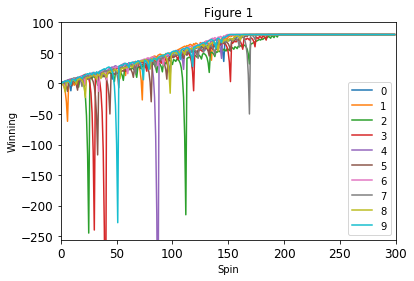

In [53]:
win_prob = 18/38 	

experiment_1 = pd.DataFrame(record_episode(10, False))
plot_data(experiment_1.loc[:,:299].transpose(), 'Figure 1')

In [55]:
experiment_1['win_time'] = experiment_1.apply(lambda row: row.idxmax(), axis=1)

In [60]:
experiment_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,win_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,-0.092000,-0.164000,-0.264000,-0.560000,-0.426000,-0.444000,-1.01800,-1.568000,-2.073000,-1.036000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,167.826000
std,0.996257,1.897025,3.117053,5.069329,7.209334,9.904896,15.01463,21.996072,32.419357,38.040002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.968423
min,-1.000000,-3.000000,-7.000000,-15.000000,-31.000000,-63.000000,-127.00000,-255.000000,-511.000000,-1023.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,127.000000
25%,-1.000000,-3.000000,-2.000000,-1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,158.000000
50%,-1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.00000,3.000000,3.000000,4.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,167.000000
75%,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.00000,4.000000,5.000000,5.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,176.250000
max,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.00000,8.000000,8.000000,9.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,221.000000


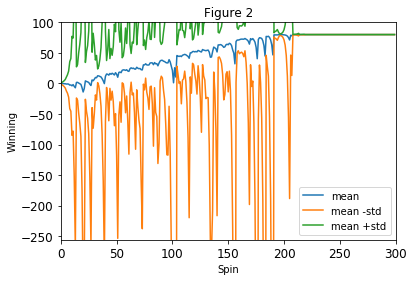

In [62]:
    experiment_1 = pd.DataFrame(record_episode(1000, False))
    experiment_1 = summarize(experiment_1)
    plot_data(experiment_1[['mean', 'mean -std', 'mean +std']].loc[:299,:], 'Figure 2')

In [ ]:
experiment_1

In [63]:
experiment_1[['mean', 'mean -std', 'mean +std']].describe()

,mean,mean -std,mean +std
count,1000.000000,1000.000000,1000.000000
mean,71.482761,46.547123,96.418399
std,20.610445,110.193537,92.603218
min,-13.991000,-1067.254705,0.945041
25%,80.000000,80.000000,80.000000
50%,80.000000,80.000000,80.000000
75%,80.000000,80.000000,80.000000
max,80.000000,80.000000,1083.156909


In [81]:
    # experiment_2 = pd.DataFrame(record_episode(1000, True))
    experiment_2 = summarize(experiment_2)

    # plot_data(experiment_2[['mean', 'mean -std', 'mean +std']].loc[:299,:], 'Figure 4')
    # plot_data(experiment_2[['median', 'median -std', 'median +std']].loc[:299,:], 'Figure 5')


In [82]:
experiment_2

,mean,median,std,mean -std,mean +std,median -std,median +std
0,-0.080,-1.0,0.997294,-1.077294,0.917294,-1.997294,-0.002706
1,-0.146,0.0,1.913726,-2.059726,1.767726,-1.913726,1.913726
2,-0.193,1.0,3.123381,-3.316381,2.930381,-2.123381,4.123381
3,-0.282,1.0,4.720462,-5.002462,4.438462,-3.720462,5.720462
4,-0.206,2.0,6.758346,-6.964346,6.552346,-4.758346,8.758346
5,-0.452,2.0,10.188400,-10.640400,9.736400,-8.188400,12.188400
6,-0.394,3.0,14.749791,-15.143791,14.355791,-11.749791,17.749791
7,-0.809,3.0,21.267506,-22.076506,20.458506,-18.267506,24.267506
8,-1.238,4.0,25.808398,-27.046398,24.570398,-21.808398,29.808398
9,-2.473,4.0,33.179755,-35.652755,30.706755,-29.179755,37.179755


In [78]:
experiment_2.iloc[:,-1].mean()

220.2435491084737

In [ ]:


    experiment_1 = pd.DataFrame(record_episode(1000, False))
    experiment_1 = summarize(experiment_1)
    plot_data(experiment_1[['mean', 'mean -std', 'mean +std']].loc[:299,:], 'Figure 2')

    plot_data(experiment_1[['median', 'median -std', 'median +std']].loc[:299,:], 'Figure 3')


 

In [4]:
def get_spin_result(win_prob):  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
 	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    result = False  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    if np.random.random() <= win_prob:  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
        result = True  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    return result  		

In [5]:
def bet_strategy(): 
    episode_winnings = 0 
    records = np.zeros(1000)
    num_spins = 0
    while episode_winnings < 80: 
        won = False
        bet_amount = 1 
        while not won: 
            won = get_spin_result(18/38)
            if won == True: 
                episode_winnings = episode_winnings + bet_amount
            else: 
                episode_winnings = episode_winnings - bet_amount
                bet_amount = bet_amount * 2 
            records[num_spins]= episode_winnings
            num_spins += 1
            if num_spins == 1000: 
                break
    records[num_spins:]= records[num_spins - 1]
    return records 

In [6]:
def bet_strategy_realistic(): 
    episode_winnings = 0 
    records = np.zeros(1000)
    num_spins = 0
    bankroll = 256 
    while episode_winnings < 80 and bankroll > 0 and num_spins <1000 :  
        won = False
        bet_amount = 1 
        while not won and bankroll > 0 and num_spins <1000 : 
            won = get_spin_result(18/37)
            if won == True: 
                episode_winnings = episode_winnings + bet_amount
                bankroll = bankroll + bet_amount 
            else: 
                episode_winnings = episode_winnings - bet_amount
                bankroll = bankroll - bet_amount 
                bet_amount = min(bet_amount * 2, bankroll)
            records[num_spins]= episode_winnings
            num_spins += 1
           
    records[num_spins:]= records[num_spins - 1]
    return records 

In [193]:
def record_episode(num_episode, realistic=True):
    num_spins = 1000 
    outcome = np.zeros((num_episode, num_spins))
    for i in range(0, num_episode): 
        if realistic: 
            outcome[i, :] = bet_strategy_realistic()
        else: 
            outcome[i, :] = bet_strategy()
    return outcome

In [196]:
q1 = record_episode(1000, False)

df_q1 = pd.DataFrame(q1)

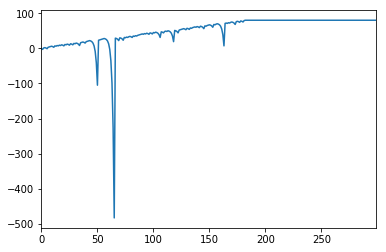

In [211]:
df_q1.loc[1,:][:300].plot()

In [202]:
df_q1[df_q1[999] == 80].describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,-0.014000,-0.023000,-0.027000,-0.048000,0.08900,0.033000,-0.062000,-0.203000,-1.570000,-2.240000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0
std,1.000402,1.891573,3.062295,4.574125,6.49394,8.822003,12.978621,18.049088,31.024081,51.516855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.000000,-3.000000,-7.000000,-15.000000,-31.00000,-63.000000,-127.000000,-255.000000,-511.000000,-1023.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0
25%,-1.000000,-3.000000,0.000000,-1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,2.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0
50%,-1.000000,0.500000,1.000000,1.000000,2.00000,2.000000,3.000000,3.000000,4.000000,4.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0
75%,1.000000,2.000000,2.000000,2.000000,3.00000,4.000000,4.000000,5.000000,5.000000,6.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0
max,1.000000,2.000000,3.000000,4.000000,5.00000,6.000000,7.000000,8.000000,9.000000,9.000000,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0


In [189]:
def plot_data(df, title="roulette"): 
    ax = df.plot(title=title, fontsize=12, label='winnig')
    ax.set_xlabel("Spin")  
    ax.set_xlim([0, 300])  
    ax.set_ylim([-256, 100]) 
    ax.legend()
    plt.ylabel("Winning")
    plt.savefig('./images/{}.png'.format(title))

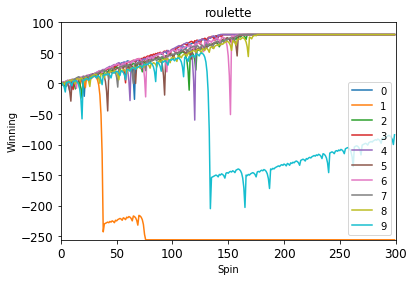

In [190]:
plot_data(df.loc[:,:299].transpose())

In [179]:
def summarize(df): 
    df_summary = pd.DataFrame(df.mean(), columns=['mean'])
    df_median = pd.DataFrame(df.median(), columns=['median'])
    df_std = pd.DataFrame(df.std(), columns=['std'])
    df_summary = df_summary.join(df_median).join(df_std)
    return df_summary

In [180]:
df_stats = summarize(df_1000)

In [181]:
df_stats['mean-std'] = df_stats['mean']-df_stats['std']
df_stats['mean+std'] = df_stats['mean']+df_stats['std']
df_stats['median-std'] = df_stats['median']-df_stats['std']
df_stats['median+std'] = df_stats['median']+df_stats['std']

In [182]:
df_stats.head(5)

,mean,median,std,mean-std,mean+std,median-std,median+std
0,0.004,1.0,1.000492,-0.996492,1.004492,-0.000492,2.000492
1,-0.008,1.0,1.910389,-1.918389,1.902389,-0.910389,2.910389
2,0.025,1.0,3.012549,-2.987549,3.037549,-2.012549,4.012549
3,0.146,1.0,4.298274,-4.152274,4.444274,-3.298274,5.298274
4,-0.175,2.0,6.921870,-7.096870,6.746870,-4.921870,8.921870


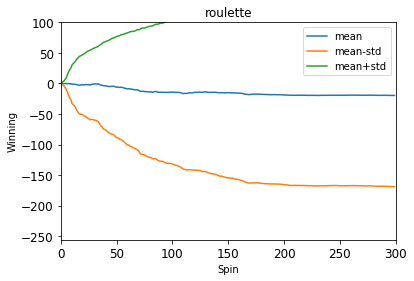

In [183]:
plot_data(df_stats[['mean', 'mean-std', 'mean+std']].loc[:299,:])

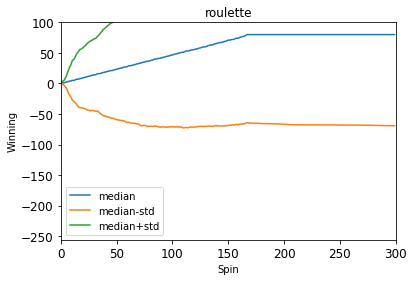

In [184]:
plot_data(df_stats[['median', 'median-std', 'median+std']].loc[:299,:])